# <font color="red">*Face Detection - Real Time*</font>

# *Part 1: Setup and Data picking*

In [162]:
# Folder Structure:
# To use this code, organize your data in the following folder structure:
#
# facedetection/
#     * data/
#         * images/              # Original images for training, testing, and validation
#         * labels/              # Labels or annotations corresponding to the images
#         * train/               # Training data
#             * images/          # Training images
#             * labels/          # Training labels
#         * test/                # Testing data
#             * images/          # Testing images
#             * labels/          # Testing labels
#         * val/                 # Validation data
#             * images/          # Validation images
#             * labels/          # Validation labels
#     * aug_data/                # Augmented data for training, testing, and validation
#         * train/               # Augmented training data
#             * images/          # Augmented training images
#             * labels/          # Augmented training labels
#         * test/                # Augmented testing data
#             * images/          # Augmented testing images
#             * labels/          # Augmented testing labels
#         * val/                 # Augmented validation data
#             * images/          # Augmented validation images
#             * labels/          # Augmented validation labels

# *1.1 Install dependencies*

In [34]:
!pip install tensorflow 
!pip install opencv-python
!pip install matplotlib 
!pip install labelme
!pip install albumentations
!pip install tensorflow-gpu 

  Using cached tensorflow-gpu-2.12.0.tar.gz (2.6 kB)
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'error'


  error: subprocess-exited-with-error
  
  python setup.py egg_info did not run successfully.
  exit code: 1
  
  [44 lines of output]
  Traceback (most recent call last):
    File "C:\ProgramData\anaconda3\Lib\site-packages\setuptools\_vendor\packaging\requirements.py", line 35, in __init__
      parsed = _parse_requirement(requirement_string)
               ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
    File "C:\ProgramData\anaconda3\Lib\site-packages\setuptools\_vendor\packaging\_parser.py", line 64, in parse_requirement
      return _parse_requirement(Tokenizer(source, rules=DEFAULT_RULES))
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
    File "C:\ProgramData\anaconda3\Lib\site-packages\setuptools\_vendor\packaging\_parser.py", line 82, in _parse_requirement
      url, specifier, marker = _parse_requirement_details(tokenizer)
                               ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
    File "C:\ProgramData\anaconda3\Lib\site-packages\setuptools\_v

In [2]:
!pip install opencv-python

# *1.2 Collecting images with OpenCV*

In [35]:
import cv2
import os
import time
import uuid
from IPython.display import Image, display

In [36]:
uuid.uuid1()

UUID('00ce69f5-6163-11ee-8158-5ccd5b6a6462')

In [37]:
IMAGES_PATH = os.path.join('data','images')
number_images = 30

**Here there's a loop sample we're going to use**

In [38]:
### The basic loop we'll be working on the cell bellow ###
for image_num in range(30):
    print(image_num)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29


**This bunch of images (30x3 = 90 / So run the loop 3x) wil be taken from the camera you set available on your computer**

In [141]:
cap = cv2.VideoCapture(0)
for imgnum in range(number_images):
    print('Collecting image {}'.format(imgnum))
    ret, frame = cap.read()
    imgname = os.path.join(IMAGES_PATH,f'{str(uuid.uuid1())}.jpg')
    cv2.imwrite(imgname, frame)
    cv2.imshow('frame', frame)
    time.sleep(0.5)

    if cv2.waitKey(1) & 0xFF == ord('q'):
        break
cap.release()
cv2.destroyAllWindows()

# *1.3 Annotate Images with LabelMe*

*Install this dependency to face label*

In [39]:
!pip install labelme

 **If it doesn't work properly, you can run in on CMD**

In [40]:
!labelme

C:\ProgramData\anaconda3\Lib\site-packages\paramiko\transport.py:219: CryptographyDeprecationWarning: Blowfish has been deprecated
  "class": algorithms.Blowfish,
[INFO   ] __init__:get_config:70 - Loading config file from: C:\Users\RAPHAEL\.labelmerc


*The warning message is an eventual output when you close the "label window"*

*Install these dependencies so we can work on the following cell*

# *Part 2: Building Image Loading Function*

# *2.1 Importing Tensorflow and dependencies*

In [44]:
import tensorflow as tf
import json
import numpy as np
import matplotlib as plt
import matplotlib.pyplot as plt

# *2.2 Avoid OO erros by setting GPU Memory Growth "just in case"*

In [142]:
gpus = tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus:
    tf.config.experimental.set_memory_growth(gpu, True)

*If there's GPU avaiable so the Output is "true"*

In [143]:
tf.test.is_gpu_available()    #or
#tf.config.list_physical_devices('GPU')

False

# *2.3 Load Image into TF Data Pipeline*

In [144]:
images = tf.data.Dataset.list_files('data\\images\\*.jpg') #, shuffle=False)

*To get the full path to image:*

In [145]:
images.as_numpy_iterator().next()

b'data\\images\\034d689d-6182-11ee-9cd6-5ccd5b6a6462.jpg'

# *2.3 Image Loading and Display*
*This code snippet loads a batch of images from file paths, decodes them, and displays them using Matplotlib.*

*This function 'load_image' reads an image file given its path, decodes it using the JPEG format, and returns the decoded image.*

In [146]:
def load_image(x):
    byte_img = tf.io.read_file(x)
    img = tf.io.decode_jpeg(byte_img)
    return img

*This line maps the 'load_image' function to each image path, effectively loading and decoding the images*

In [147]:
images = images.map(load_image)

*This line retrieves the first item from the 'images' dataset as a NumPy array.*

In [148]:
images.as_numpy_iterator().next()

array([[[167, 200, 207],
        [167, 200, 207],
        [166, 201, 205],
        ...,
        [124, 140, 140],
        [121, 139, 139],
        [120, 138, 138]],

       [[173, 204, 209],
        [173, 204, 207],
        [171, 205, 207],
        ...,
        [120, 136, 136],
        [116, 134, 134],
        [120, 138, 138]],

       [[174, 202, 203],
        [174, 203, 201],
        [173, 203, 201],
        ...,
        [125, 141, 141],
        [165, 184, 182],
        [130, 149, 147]],

       ...,

       [[ 98, 120, 117],
        [ 99, 124, 120],
        [100, 125, 121],
        ...,
        [101, 106, 110],
        [ 97, 105, 108],
        [ 95, 105, 107]],

       [[ 96, 117, 112],
        [102, 123, 118],
        [105, 126, 121],
        ...,
        [ 97, 102, 108],
        [ 98, 103, 109],
        [ 98, 105, 111]],

       [[ 99, 118, 112],
        [ 99, 118, 112],
        [ 93, 114, 107],
        ...,
        [ 93,  96, 105],
        [ 95,  99, 108],
        [ 96, 100, 109]]

# *2.4 Checking Dataset Type*
*Verify the type of the 'images' dataset after applying the 'map' operation*

In [149]:
type(images)

tensorflow.python.data.ops.map_op._MapDataset

# *2.5 Batch Image Loading*
*Create an image generator by batching the images in groups of 4*

In [150]:
image_generator = images.batch(4).as_numpy_iterator()

*Displaying Batch of Images / Create a subplot for displaying the images. Four images will be displayed in one row*

In [151]:
plot_images = image_generator.next()

# *2.6 Displaying Batch of Images*
*This code block creates a subplot with four columns, each column containing an image from the batch. It then iterates through the batch of images and displays them using Matplotlib.*

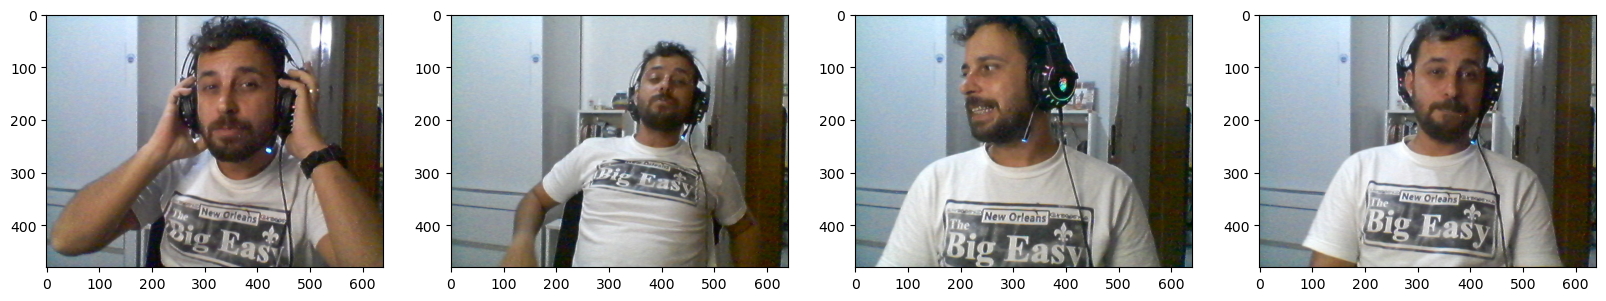

In [152]:
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, image in enumerate(plot_images):
    ax[idx].imshow(image)
plt.show()

# *Part 3: Partition / Unaugmented Data*
# *3.1 Split Data into Train, Test and Val*

*Down bellow we calculate how many samples each of these folder will have*

In [56]:
90*.7 # 63 to train

62.99999999999999

In [57]:
90*.15 # 13 and 14 to Test and Val

13.5

# *3.2 Organizing Image Labels*

*This code snippet iterates through three folders ('train', 'test', 'val') in a directory structure where each folder contains images. For each image file in these folders, it checks if there is a corresponding JSON label file in a 'labels' subfolder. If such a JSON label file exists, it moves (renames) the JSON file to a subfolder within the respective 'train', 'test', or 'val' folder, effectively organizing the labels alongside their corresponding images.*

In [58]:
import os

In [59]:
for folder in ['train', 'test', 'val']:
    for file in os.listdir(os.path.join('data', folder, 'images')):
        
        filename = file.split('.')[0]+'.json'
        existing_filepath = os.path.join('data', 'labels', filename)
        if os.path.exists(existing_filepath):
            new_filepath = os.path.join('data',folder,'labels',filename)
            os.replace(existing_filepath, new_filepath)

# *Part 4: Importing Albumentations and Defining Image Augmentation Pipeline*

In [60]:
pip install albumentations

Note: you may need to restart the kernel to use updated packages.


*We first import the "albumentations" library as "alb" for convenience. Then, we define an image augmentation pipeline called "augmentor" using Albumentations. This pipeline includes a series of image transformation operations such as random cropping, horizontal and vertical flips, random brightness/contrast adjustments, random gamma adjustment, and RGB shift. These transformations are often used to diversify and augment image datasets, making them more suitable for training deep learning models in computer vision tasks. Additionally, the code specifies parameters for bounding boxes used in object detection tasks, which are crucial for maintaining consistency between images and their associated annotations.*

In [61]:
import albumentations as alb

C:\ProgramData\anaconda3\Lib\site-packages\paramiko\transport.py:219: CryptographyDeprecationWarning: Blowfish has been deprecated
  "class": algorithms.Blowfish,


In [62]:
augmentor = alb.Compose([alb.RandomCrop(width=450, height=450),
                         alb.HorizontalFlip(p=0.5),
                         alb.RandomBrightnessContrast(p=0.2),
                         alb.RandomGamma(p=0.2),
                         alb.RGBShift(p=0.2),
                         alb.VerticalFlip(p=0.5)],
                        bbox_params=alb.BboxParams(format='albumentations',
                                                   label_fields=['class_labels']))

# *4.1 Loading Image and JSON Label Data*

*Required dependencies here*

In [63]:
import cv2
import os

*This cell loads an image from the specified file path using the OpenCV library (cv2). The image is read and stored in the "img" variable, making it available for further processing and analysis.*

In [64]:
img = cv2.imread(os.path.join('data', 'train', 'images', '6c590556-5df1-11ee-85ee-5ccd5b6a6462.jpg'))

*It displays the loaded image stored in the "img" variable. It allows for visual inspection of the image content, which is often an essential step in understanding and working with image data.*

In [65]:
img

array([[[229, 230, 196],
        [225, 226, 187],
        [218, 219, 175],
        ...,
        [ 22,  52,  57],
        [ 22,  51,  58],
        [ 22,  51,  58]],

       [[231, 233, 197],
        [231, 232, 193],
        [233, 232, 188],
        ...,
        [ 23,  52,  59],
        [ 22,  51,  58],
        [ 22,  51,  58]],

       [[235, 236, 197],
        [249, 250, 210],
        [248, 247, 203],
        ...,
        [ 23,  50,  60],
        [ 21,  50,  59],
        [ 21,  50,  59]],

       ...,

       [[197, 184, 146],
        [199, 187, 147],
        [200, 188, 146],
        ...,
        [ 29,  49,  54],
        [ 25,  42,  45],
        [ 15,  30,  33]],

       [[201, 188, 156],
        [200, 187, 155],
        [199, 187, 153],
        ...,
        [ 27,  51,  51],
        [ 21,  42,  43],
        [ 11,  31,  32]],

       [[186, 172, 144],
        [191, 177, 148],
        [194, 180, 151],
        ...,
        [ 25,  52,  49],
        [ 19,  43,  41],
        [  9,  31,  29]]

In [66]:
import json

*We'll open a JSON label file from the specified file path using Python's "json" library. The content of the JSON file is loaded into the "label" variable. This step is crucial for accessing and utilizing any annotations or metadata associated with the image, often used in tasks like object detection or image segmentation*

In [67]:
with open(os.path.join('data', 'train', 'labels', '6c590556-5df1-11ee-85ee-5ccd5b6a6462.json'), 'r') as f:
    label = json.load(f)

# *4.2 Inspecting JSON Label Data*

*It'll display the content of the "label" variable, which contains the JSON data loaded from the label file. This data typically includes information about annotations, classes, or other metadata associated with the image*

In [68]:
label

{'version': '5.3.1',
 'flags': {},
 'shapes': [{'label': 'face',
   'points': [[237.5, 2.5000000000000404],
    [481.0714285714285, 245.3571428571429]],
   'group_id': None,
   'description': '',
   'shape_type': 'rectangle',
   'flags': {}}],
 'imagePath': '..\\images\\6c590556-5df1-11ee-85ee-5ccd5b6a6462.jpg',
 'imageData': '/9j/4AAQSkZJRgABAQAAAQABAAD/2wBDAAgGBgcGBQgHBwcJCQgKDBQNDAsLDBkSEw8UHRofHh0aHBwgJC4nICIsIxwcKDcpLDAxNDQ0Hyc5PTgyPC4zNDL/2wBDAQgJCQwLDBgNDRgyIRwhMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjL/wAARCAHgAoADASIAAhEBAxEB/8QAHwAAAQUBAQEBAQEAAAAAAAAAAAECAwQFBgcICQoL/8QAtRAAAgEDAwIEAwUFBAQAAAF9AQIDAAQRBRIhMUEGE1FhByJxFDKBkaEII0KxwRVS0fAkM2JyggkKFhcYGRolJicoKSo0NTY3ODk6Q0RFRkdISUpTVFVWV1hZWmNkZWZnaGlqc3R1dnd4eXqDhIWGh4iJipKTlJWWl5iZmqKjpKWmp6ipqrKztLW2t7i5usLDxMXGx8jJytLT1NXW19jZ2uHi4+Tl5ufo6erx8vP09fb3+Pn6/8QAHwEAAwEBAQEBAQEBAQAAAAAAAAECAwQFBgcICQoL/8QAtREAAgECBAQDBAcFBAQAAQJ3AAECAxEEBSExBhJBUQdhcRMiMoEIFEKRobHBCSMzUvAVYnLRChYkNOEl8RcYGRomJygpKjU2Nzg

In [154]:
label['shapes'] # stores information about shapes or regions of interest (ROIs) in the image

[{'label': 'face',
  'points': [[411.0714285714286, 79.64285714285717],
   [620.3571428571429, 389.6428571428571]],
  'group_id': None,
  'description': '',
  'shape_type': 'rectangle',
  'flags': {}}]

In [155]:
type(label['shapes']) # Displaying the data type

list

In [156]:
label['shapes'][0] # Accessing label['shapes'][0] retrieves the first shape or region of interest (ROI) from the list of shapes

{'label': 'face',
 'points': [[411.0714285714286, 79.64285714285717],
  [620.3571428571429, 389.6428571428571]],
 'group_id': None,
 'description': '',
 'shape_type': 'rectangle',
 'flags': {}}

In [157]:
label['shapes'][0]['label'] # In annotation data, this label often provides information about the class or category of the object represented by the ROI

'face'

In [159]:
label['shapes'][0]['points'] # It retrieves the coordinates or points that define the shape or region of interest (ROI). These points typically represent the boundary or outline of an object in the image

[[411.0714285714286, 79.64285714285717],
 [620.3571428571429, 389.6428571428571]]

# *4.3 Converting Annotation Coordinates to Normalized Format*

*In this code block, coordinates defining a region of interest (ROI) from label['shapes'][0] are extracted and stored in the coords list. These coordinates are then transformed into normalized format by dividing them by the image dimensions [640, 480, 640, 480]. Normalizing coordinates to values between 0 and 1 is a common practice in computer vision tasks, making them scale-independent and compatible with various image sizes*

In [74]:
coords = [0,0,0,0]
coords[0] = label['shapes'][0]['points'][0][0]
coords[1] = label['shapes'][0]['points'][0][1]
coords[2] = label['shapes'][0]['points'][1][0]
coords[3] = label['shapes'][0]['points'][1][1]

*The coords list stores the normalized annotation coordinates, making them scale-independent and suitable for various image sizes and resolutions*

In [75]:
coords

[237.5, 2.5000000000000404, 481.0714285714285, 245.3571428571429]

In [76]:
import numpy as np

*Scaling the annotation coordinates in the coords list by dividing them by the image dimensions [640, 480, 640, 480], effectively normalizing the coordinates to a range of [0, 1] and making them independent of the original image resolution*

In [77]:
coords = list(np.divide(coords, [640,480,640,480]))

*After normalization, the coords list was transformed into [0.37109375, 0.005208333333333417, 0.751674107142857, 0.5111607142857143], where the values are in a normalized format, ranging from 0 to 1, making them scale-independent and suitable for use with images of different resolutions and sizes*

In [78]:
coords

[0.37109375, 0.005208333333333417, 0.751674107142857, 0.5111607142857143]

# *4.4 Image Augmentation and Annotation Augmentation with Albumentations*

*In this session, we perform image augmentation and annotation augmentation using Albumentations. The code applies a series of transformations to the input image and its associated bounding box annotations ('face'). The output includes the augmented image, metadata keys, the augmented image itself with its dimensions, and the augmented bounding box annotations*

In [79]:
augmented = augmentor(image=img, bboxes=[coords], class_labels=['face'])

In [80]:
augmented

{'image': array([[[ 57,  45,  45],
         [ 57,  45,  45],
         [ 57,  45,  45],
         ...,
         [255, 255, 211],
         [255, 255, 212],
         [255, 255, 215]],
 
        [[ 57,  45,  45],
         [ 55,  45,  45],
         [ 52,  45,  46],
         ...,
         [255, 255, 212],
         [255, 255, 214],
         [255, 255, 216]],
 
        [[ 57,  45,  45],
         [ 55,  45,  45],
         [ 50,  45,  45],
         ...,
         [255, 255, 215],
         [255, 255, 215],
         [255, 255, 216]],
 
        ...,
 
        [[100,  68,  71],
         [ 72,  45,  47],
         [ 59,  45,  47],
         ...,
         [166, 145, 110],
         [166, 145, 110],
         [170, 145, 112]],
 
        [[110,  74,  77],
         [ 81,  45,  51],
         [ 64,  45,  47],
         ...,
         [167, 145, 106],
         [164, 144, 104],
         [168, 144, 106]],
 
        [[113,  72,  79],
         [ 83,  45,  51],
         [ 65,  45,  46],
         ...,
         [191, 161,

In [81]:
augmented.keys()

dict_keys(['image', 'bboxes', 'class_labels'])

In [82]:
augmented['image']

array([[[ 57,  45,  45],
        [ 57,  45,  45],
        [ 57,  45,  45],
        ...,
        [255, 255, 211],
        [255, 255, 212],
        [255, 255, 215]],

       [[ 57,  45,  45],
        [ 55,  45,  45],
        [ 52,  45,  46],
        ...,
        [255, 255, 212],
        [255, 255, 214],
        [255, 255, 216]],

       [[ 57,  45,  45],
        [ 55,  45,  45],
        [ 50,  45,  45],
        ...,
        [255, 255, 215],
        [255, 255, 215],
        [255, 255, 216]],

       ...,

       [[100,  68,  71],
        [ 72,  45,  47],
        [ 59,  45,  47],
        ...,
        [166, 145, 110],
        [166, 145, 110],
        [170, 145, 112]],

       [[110,  74,  77],
        [ 81,  45,  51],
        [ 64,  45,  47],
        ...,
        [167, 145, 106],
        [164, 144, 104],
        [168, 144, 106]],

       [[113,  72,  79],
        [ 83,  45,  51],
        [ 65,  45,  46],
        ...,
        [191, 161, 112],
        [185, 155, 108],
        [178, 148, 101]]

In [83]:
augmented['image'].shape

(450, 450, 3)

In [84]:
augmented['bboxes']

[(0.0, 0.5014285714285714, 0.5077777777777778, 1.0)]

In [85]:
import matplotlib.pyplot as plt

# *4.5 Overlaying Augmented Bounding Box on Augmented Image*

*This code block draws a bounding box (rectangle) on the augmented image using OpenCV (cv2.rectangle). The bounding box coordinates are based on the augmented annotation (augmented['bboxes'][0]) and scaled to match the dimensions of a 450x450 image. The rectangle is drawn in red (RGB: 255, 0, 0) with a thickness of 2. Finally, the augmented image with the overlaid bounding box is displayed using Matplotlib (plt.imshow). This visualization helps inspect and verify the effect of image augmentation and annotation augmentation on the data.*

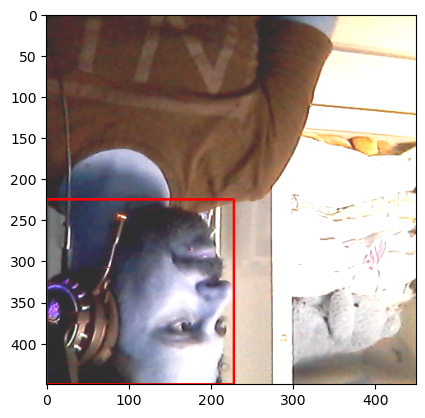

In [86]:
cv2.rectangle(augmented['image'],
              tuple(np.multiply(augmented['bboxes'][0][:2], [450,450]).astype(int)),
              tuple(np.multiply(augmented['bboxes'][0][2:], [450,450]).astype(int)),
                    (255,0,0), 2)
plt.imshow(augmented['image'])              

# *Part 5: Building Augmentation Pipeline*

# *5.1 Data Augmentation and Annotation for Multiple Image Partitions*

*In this code, data augmentation and annotation augmentation are performed for multiple image partitions, such as 'train', 'test', and 'val'. For each image in each partition, it loads the image and attempts to load annotation data from JSON files. If annotation data is available, it extracts the coordinates, normalizes them, and then applies data augmentation. A total of 60 augmented images per input image are generated. Bounding box annotations and class labels are updated accordingly, and both the augmented images and their annotations are saved in a new directory ('aug_data'). This code efficiently expands the dataset for various machine learning tasks, such as object detection or classification, while maintaining consistent annotations. Any exceptions encountered during the process are printed for debugging purposes.*

In [87]:
for partition in ['train','test','val']: 
    for image in os.listdir(os.path.join('data', partition, 'images')):
        img = cv2.imread(os.path.join('data', partition, 'images', image))
        
        coords = [0,0,0.00001,0.00001]
        label_path = os.path.join('data', partition, 'labels', f'{image.split(".")[0]}.json')
        if os.path.exists(label_path):
            with open(label_path, 'r') as f:
                label = json.load(f)

            coords[0] = label['shapes'][0]['points'][0][0]
            coords[1] = label['shapes'][0]['points'][0][1]
            coords[2] = label['shapes'][0]['points'][1][0]
            coords[3] = label['shapes'][0]['points'][1][1]
            coords = list(np.divide(coords, [640,480,640,480]))

        try: 
            for x in range(60):
                augmented = augmentor(image=img, bboxes=[coords], class_labels=['face'])
                cv2.imwrite(os.path.join('aug_data', partition, 'images', f'{image.split(".")[0]}.{x}.jpg'), augmented['image'])

                annotation = {}
                annotation['image'] = image

                if os.path.exists(label_path):
                    if len(augmented['bboxes']) == 0: 
                        annotation['bbox'] = [0,0,0,0]
                        annotation['class'] = 0 
                    else: 
                        annotation['bbox'] = augmented['bboxes'][0]
                        annotation['class'] = 1
                else: 
                    annotation['bbox'] = [0,0,0,0]
                    annotation['class'] = 0 


                with open(os.path.join('aug_data', partition, 'labels', f'{image.split(".")[0]}.{x}.json'), 'w') as f:
                    json.dump(annotation, f)

        except Exception as e:
            print(e)

In [88]:
import tensorflow as tf
import cv2

# *5.2 Loading and Preprocessing Augmented Images for Training, Testing, and Validation*

*The code is preparing the data for machine learning by loading, resizing, and scaling the images, making them suitable for training, testing, and validation in a deep learning model.*

In [89]:
train_images = tf.data.Dataset.list_files('aug_data\\train\\images\\*.jpg', shuffle=False)
train_images = train_images.map(load_image)
train_images = train_images.map(lambda x: tf.image.resize(x, (120,120)))
train_images = train_images.map(lambda x: x/255)

In [90]:
test_images = tf.data.Dataset.list_files('aug_data\\test\\images\\*.jpg', shuffle=False)
test_images = test_images.map(load_image)
test_images = test_images.map(lambda x: tf.image.resize(x, (120,120)))
test_images = test_images.map(lambda x: x/255)

In [91]:
val_images = tf.data.Dataset.list_files('aug_data\\val\\images\\*.jpg', shuffle=False)
val_images = val_images.map(load_image)
val_images = val_images.map(lambda x: tf.image.resize(x, (120,120)))
val_images = val_images.map(lambda x: x/255)

*The code train_images.as_numpy_iterator()'.next() is used to retrieve the first batch of images from the train_images dataset:*

- *1) 'train_images.as_numpy_iterator(): This part creates an iterator for the 'train_images' dataset, allowing you to iterate over its elements.*

- *2) '.next()': The 'next()' method is called on the iterator, which advances the iterator by one step and returns the next element. In this case, it retrieves the first element (batch) of images from the dataset.*

*This code is often used for quick inspection or debugging purposes to check what the first batch of images looks like after loading and preprocessing*

In [92]:
train_images.as_numpy_iterator().next()

array([[[0.03921569, 0.        , 0.03137255],
        [0.03921569, 0.        , 0.03400735],
        [0.03921569, 0.        , 0.03529412],
        ...,
        [0.58590686, 0.671201  , 0.83835787],
        [0.57892156, 0.6642157 , 0.83137256],
        [0.60422796, 0.69442403, 0.8591299 ]],

       [[0.03921569, 0.00214461, 0.02708333],
        [0.03921569, 0.        , 0.03137255],
        [0.03921569, 0.        , 0.03137255],
        ...,
        [0.5844363 , 0.6653186 , 0.84227943],
        [0.6201593 , 0.6916054 , 0.8715686 ],
        [0.6151348 , 0.6963235 , 0.86807597]],

       [[0.03921569, 0.        , 0.03137255],
        [0.03921569, 0.        , 0.03137255],
        [0.03921569, 0.        , 0.03137255],
        ...,
        [0.5959559 , 0.6849877 , 0.85808825],
        [0.60545343, 0.6863358 , 0.86329657],
        [0.62199754, 0.7031863 , 0.8749387 ]],

       ...,

       [[0.30618873, 0.25520834, 0.32579657],
        [0.30189952, 0.2509191 , 0.32150736],
        [0.3088848 , 0

# *Part 6: Load and Preprocess Augmented Image Labels for Train, Test, and Val*

# *6.1 Building Label Loading Function*

In [93]:
def load_labels(label_path):
    with open(label_path.numpy(), 'r', encoding = "utf-8") as f:
        label = json.load(f)
        
    return [label['class']], label['bbox']

# *6.2 Loading and Processing Label Data for Training, Testing, and Validation Sets*

In [94]:
train_labels = tf.data.Dataset.list_files('aug_data\\train\\labels\\*.json', shuffle=False)
train_labels = train_labels.map(lambda x: tf.py_function(load_labels, [x], [tf.uint8, tf.float16]))

In [95]:
test_labels = tf.data.Dataset.list_files('aug_data\\test\\labels\\*.json', shuffle=False)
test_labels = test_labels.map(lambda x: tf.py_function(load_labels, [x], [tf.uint8, tf.float16]))

In [96]:
val_labels = tf.data.Dataset.list_files('aug_data\\val\\labels\\*.json', shuffle=False)
val_labels = val_labels.map(lambda x: tf.py_function(load_labels, [x], [tf.uint8, tf.float16]))

*This line of code fetches the first batch of labels from the train_labels dataset as a NumPy array, allowing for quick inspection and verification of label data after loading and preprocessing.*

In [97]:
train_labels.as_numpy_iterator().next()

(array([1], dtype=uint8),
 array([0.0643, 0.5015, 0.6055, 1.    ], dtype=float16))

# *Part 7: Combine Label and Image Samples*

# *7.1 Check Partition Lengths*

*Calculate and display the lengths (number of samples) for the training, testing, and validation datasets, both for the image data and their corresponding labels*

In [98]:
len(train_images), len(train_labels), len(test_images), len(test_labels), len(val_images), len(val_labels)

(3780, 3780, 840, 840, 780, 780)

# *7.2 Creating Batches and Preparing Datasets for Training, Testing, and Validation*

In [99]:
train = tf.data.Dataset.zip((train_images, train_labels))
train = train.shuffle(5000)
train = train.batch(8)
train = train.prefetch(4)

In [100]:
test = tf.data.Dataset.zip((test_images, test_labels))
test = test.shuffle(1300)
test = test.batch(8)
test = test.prefetch(4)

In [101]:
val = tf.data.Dataset.zip((val_images, val_labels))
val = val.shuffle(1000)
val = val.batch(8)
val = val.prefetch(4)

In [102]:
train.as_numpy_iterator().next()[1]

(array([[1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1]], dtype=uint8),
 array([[0.0357 , 0.577  , 0.304  , 0.942  ],
        [0.2646 , 0.1068 , 0.5327 , 0.472  ],
        [0.2512 , 0.1484 , 0.58   , 0.488  ],
        [0.10046, 0.01413, 0.4385 , 0.4253 ],
        [0.595  , 0.2465 , 0.964  , 0.667  ],
        [0.00778, 0.1802 , 0.3855 , 0.599  ],
        [0.     , 0.4902 , 0.2192 , 1.     ],
        [0.592  , 0.2192 , 1.     , 0.562  ]], dtype=float16))

# *7.3 Visualizing Augmented Training Data Samples*

*This iterator allows for iterating over the training data in batches, facilitating the process of feeding data to a machine learning model during training*

In [103]:
data_samples = train.as_numpy_iterator()

*This batch typically contains a set of images and their corresponding labels*

In [104]:
res = data_samples.next()

# *7.4 Visualizing a sample of training data after augmentation.*

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


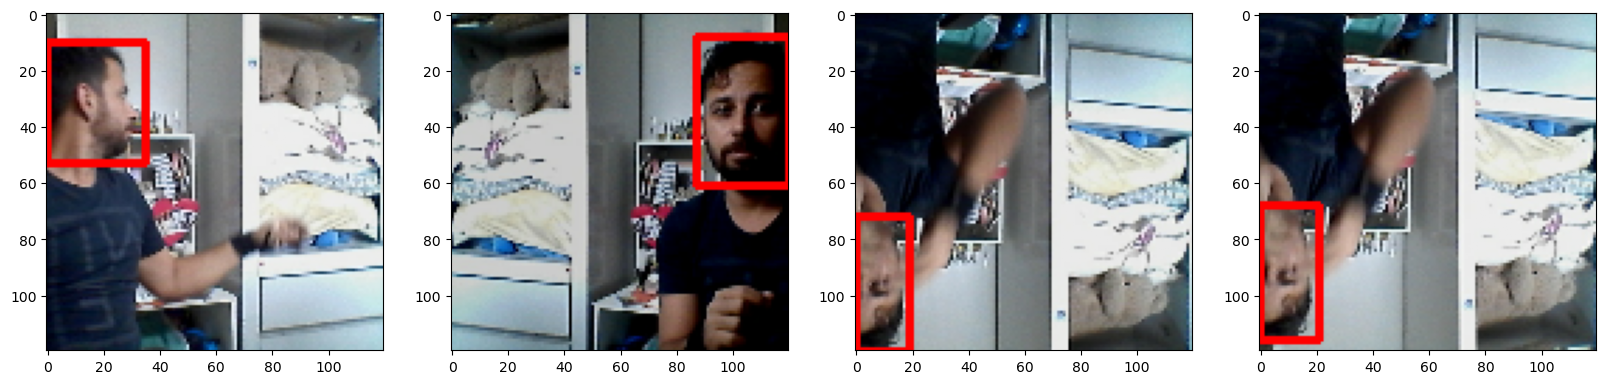

In [105]:
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx in range(4):
    sample_image = res[0][idx]
    sample_coords = res[1][1][idx]
    
    cv2.rectangle(sample_image,
                  tuple(np.multiply(sample_coords[:2], [120,120]).astype(int)),
                  tuple(np.multiply(sample_coords[2:], [120,120]).astype(int)),
                          (255,0,0), 2)
    
    ax[idx].imshow(sample_image)

# *Part 8: Build Deep Learning using VGG16 / Functional API*

*Importing required dependencies for the following session of the code*

In [106]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Conv2D, Dense, GlobalMaxPooling2D
from tensorflow.keras.applications import VGG16

# *8.1 Creating a VGG16 Model for Feature Extraction and Downaload*

*VGG16 model is instantiated with the include_top argument set to False. This configuration loads the VGG16 architecture without its top (fully connected) layers. VGG16 is often used as a feature extractor in deep learning tasks, as it can capture hierarchical features from images*

*Downloading VGG16*

In [107]:
vgg = VGG16(include_top=False)

In [108]:
vgg.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, None, None, 3)]   0         
                                                                 
 block1_conv1 (Conv2D)       (None, None, None, 64)    1792      
                                                                 
 block1_conv2 (Conv2D)       (None, None, None, 64)    36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, None, None, 64)    0         
                                                                 
 block2_conv1 (Conv2D)       (None, None, None, 128)   73856     
                                                                 
 block2_conv2 (Conv2D)       (None, None, None, 128)   147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, None, None, 128)   0     

# *8.2  Building a Combined Model for Face Detection*

*Define a function build_model() that constructs a combined model for face detection. The model architecture consists of two branches:*

- <font color="red">*Classification Model*:</font> *This branch utilizes features extracted from a VGG16 backbone to perform face classification. It includes global max-pooling, followed by two dense layers with ReLU activation functions and a final output layer with a sigmoid activation function*

- <font color="red">*Bounding Box Model:*:</font> *Similar to the classification branch, this branch uses VGG16 features but focuses on predicting bounding box coordinates. It also includes global max-pooling, two dense layers with ReLU activation, and a final output layer with a sigmoid activation*

*The `facetracker` model combines both branches, taking an input of shape (120, 120, 3) and producing two outputs: face classification (binary) and bounding box regression. This model is designed for tasks like face detection, where the goal is to simultaneously classify faces and predict their locations.*

In [109]:
def build_model():
    input_layer = Input(shape=(120,120,3))
    
    vgg = VGG16(include_top=False)(input_layer)
    
    # Classification Model
    f1 = GlobalMaxPooling2D()(vgg)
    class1 = Dense(2048, activation='relu')(f1)
    class2 = Dense(1, activation='sigmoid')(class1)
    
    # Bounding box model
    f2 = GlobalMaxPooling2D()(vgg)
    regress1 = Dense(2048, activation='relu')(f2)
    regress2 = Dense(4, activation='sigmoid')(regress1)
    
    facetracker = Model(inputs=input_layer, outputs=[class2, regress2])
    return facetracker

# *8.3 Model Prediction and Evaluation*

*In this session, the following steps are performed:*

- *The "facetracker" model is constructed using the `build_model()` function*
- *A summary of the model's architecture is displayed using facetracker.summary()*
- *A batch of training data (`X`) and labels (`y`) are extracted from the training dataset*
- *The shape of `X` is displayed to understand its dimensions*
- *The "facetracker" model is used to predict classes and bounding box coordinates (`classes` and `coords`) for the input batch `X`*
- *The predicted classes and coordinates are displayed, which are crucial for evaluating the model's performance in face detection tasks*


In [110]:
facetracker = build_model()

In [111]:
facetracker.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_2 (InputLayer)        [(None, 120, 120, 3)]        0         []                            
                                                                                                  
 vgg16 (Functional)          (None, None, None, 512)      1471468   ['input_2[0][0]']             
                                                          8                                       
                                                                                                  
 global_max_pooling2d (Glob  (None, 512)                  0         ['vgg16[0][0]']               
 alMaxPooling2D)                                                                                  
                                                                                              

In [112]:
X, y = train.as_numpy_iterator().next()

In [113]:
X.shape

(8, 120, 120, 3)

In [114]:
classes, coords = facetracker.predict(X)

1/1 [==============================] - 1s 943ms/step


In [115]:
classes, coords

(array([[0.5226059 ],
        [0.51660484],
        [0.55558443],
        [0.55888003],
        [0.52288705],
        [0.48530492],
        [0.45311615],
        [0.47933295]], dtype=float32),
 array([[0.4940447 , 0.608836  , 0.41167563, 0.504793  ],
        [0.5373983 , 0.627764  , 0.33260116, 0.4709062 ],
        [0.48894766, 0.5772303 , 0.4232466 , 0.49795464],
        [0.484787  , 0.5367736 , 0.4270836 , 0.45187724],
        [0.4387208 , 0.61786866, 0.3702942 , 0.46825513],
        [0.47199258, 0.5931343 , 0.3869725 , 0.4265044 ],
        [0.39654475, 0.5513931 , 0.37857622, 0.3860431 ],
        [0.5753385 , 0.5889731 , 0.36993083, 0.48659813]], dtype=float32))

# *Part 9: Losses and Optimizers*

# *9.1 Optimizer and Learning rate*

In [116]:
batches_per_epoch = len(train)
lr_decay = (1./0.75 -1)/batches_per_epoch

In [117]:
opt = tf.keras.optimizers.Adam(learning_rate=0.0001)

# *9.2 Localization Loss and Classification Loss*

*Localization Loss Function for Object Detection*

In [118]:
def localization_loss(y_true, yhat):            
    delta_coord = tf.reduce_sum(tf.square(y_true[:,:2] - yhat[:,:2]))
                  
    h_true = y_true[:,3] - y_true[:,1] 
    w_true = y_true[:,2] - y_true[:,0] 

    h_pred = yhat[:,3] - yhat[:,1] 
    w_pred = yhat[:,2] - yhat[:,0] 
    
    delta_size = tf.reduce_sum(tf.square(w_true - w_pred) + tf.square(h_true-h_pred))
    
    return delta_coord + delta_size

*Optimizing binary classification with BinaryCrossentropy and enhancing localization with a custom localization loss in TensorFlow*

*Defining a BinaryCrossentropy loss function for classification (`classloss`) and a custom localization loss function (`localization_loss`) for regression.*

In [119]:
classloss = tf.keras.losses.BinaryCrossentropy()
regressloss = localization_loss

*Calculating the localization loss for a specific example using the `localization_loss` function with ground truth bounding box `y[1]` and predicted coordinates `coords`*`

In [120]:
localization_loss(y[1], coords)

<tf.Tensor: shape=(), dtype=float32, numpy=4.899607>

*Evaluating the classification loss using the `classloss` BinaryCrossentropy function for a specific example with ground truth class `y[0]` and predicted class probabilities `classes`.*

In [121]:
classloss(y[0], classes)

<tf.Tensor: shape=(), dtype=float32, numpy=0.6721616>

*Calculating the combined regression loss for a specific example, which is essential for training a model to accurately localize objects in an image*

In [122]:
regressloss(y[1], coords)

<tf.Tensor: shape=(), dtype=float32, numpy=4.899607>

# *Part 10: Training Neural Network*

# *10.1 Custom FaceTracker Model for Face Detection*

- *This code defines a custom `FaceTracker` model class, which is designed for face detection tasks. The `FaceTracker` class inherits from TensorFlow's `Model` class and serves as an interface for training and evaluation. It takes an existing `eyetracker` model as its backbone.*

- *The `FaceTracker` class encapsulates the functionality needed for training and evaluating the combined face detection model, making it easier to manage the training process.*

In [123]:
class FaceTracker(Model): 
    def __init__(self, eyetracker,  **kwargs): 
        super().__init__(**kwargs)
        self.model = eyetracker

    def compile(self, opt, classloss, localizationloss, **kwargs):
        super().compile(**kwargs)
        self.closs = classloss
        self.lloss = localizationloss
        self.opt = opt
    
    def train_step(self, batch, **kwargs): 
        
        X, y = batch
        
        with tf.GradientTape() as tape: 
            classes, coords = self.model(X, training=True)
            
            batch_classloss = self.closs(y[0], classes)
            batch_localizationloss = self.lloss(tf.cast(y[1], tf.float32), coords)            
            total_loss = batch_localizationloss+0.5*batch_classloss
            
            grad = tape.gradient(total_loss, self.model.trainable_variables)
        
        opt.apply_gradients(zip(grad, self.model.trainable_variables))
        
        return {"total_loss":total_loss, "class_loss":batch_classloss, "regress_loss":batch_localizationloss}
    
    def test_step(self, batch, **kwargs): 
        X, y = batch
        
        classes, coords = self.model(X, training=False)
        
        batch_classloss = self.closs(y[0], classes)
        batch_localizationloss = self.lloss(tf.cast(y[1], tf.float32), coords)
        total_loss = batch_localizationloss+0.5*batch_classloss
        
        return {"total_loss":total_loss, "class_loss":batch_classloss, "regress_loss":batch_localizationloss}
        
    def call(self, X, **kwargs): 
        return self.model(X, **kwargs)

*Creating a Face Detection Model Instance*

In [124]:
model = FaceTracker(facetracker)

*Model Compilation for Face Detection*

In [125]:
model.compile(opt, classloss, regressloss)

# *10.2 Training the Face Detection Model with TensorBoard Logging*

*This directory will contain valuable information for monitoring and analyzing the training process and can be customized to a different directory path if needed*

In [126]:
logdir='logs'

*The callback is used to log and visualize training progress and metrics using TensorBoard, providing valuable insights into model training*

In [127]:
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)

 *The training history is stored in the `history` variable, which can be used to analyze and visualize the model's performance over the training epochs*

In [128]:
history = model.fit(train, epochs=10, validation_data=val, callbacks=[tensorboard_callback])

Epoch 1/10
473/473 [==============================] - 1318s 3s/step - total_loss: 0.3472 - class_loss: 0.0575 - regress_loss: 0.3185 - val_total_loss: 0.0526 - val_class_loss: 0.0042 - val_regress_loss: 0.0505
Epoch 2/10
473/473 [==============================] - 1334s 3s/step - total_loss: 0.1080 - class_loss: 0.0236 - regress_loss: 0.0962 - val_total_loss: 0.0478 - val_class_loss: 5.4423e-05 - val_regress_loss: 0.0478
Epoch 3/10
473/473 [==============================] - 1239s 3s/step - total_loss: 0.0743 - class_loss: 0.0153 - regress_loss: 0.0667 - val_total_loss: 0.0369 - val_class_loss: 1.9968e-06 - val_regress_loss: 0.0369
Epoch 4/10
473/473 [==============================] - 1207s 3s/step - total_loss: 0.0698 - class_loss: 0.0147 - regress_loss: 0.0624 - val_total_loss: 0.1265 - val_class_loss: 0.0018 - val_regress_loss: 0.1256
Epoch 5/10
473/473 [==============================] - 1284s 3s/step - total_loss: 0.0512 - class_loss: 0.0095 - regress_loss: 0.0464 - val_total_loss: 0

*Accessing the training history*

In [129]:
history.history

{'total_loss': [0.029679611325263977,
  0.06853318959474564,
  0.014773642644286156,
  0.02980768494307995,
  0.008740509860217571,
  0.005853541661053896,
  0.020571043714880943,
  0.00586317665874958,
  0.00317768775857985,
  0.01889267936348915],
 'class_loss': [0.003251308109611273,
  0.014861911535263062,
  1.8388369426247664e-05,
  0.0002509326150175184,
  2.0415178369148634e-05,
  0.00013882227358408272,
  0.000273898767773062,
  0.0001038868649629876,
  2.8224012567079626e-05,
  0.00032166996970772743],
 'regress_loss': [0.02805395796895027,
  0.061102233827114105,
  0.014764448627829552,
  0.0296822190284729,
  0.008730302564799786,
  0.005784130655229092,
  0.020434094592928886,
  0.005811233073472977,
  0.0031635756604373455,
  0.018731843680143356],
 'val_total_loss': [0.05257110670208931,
  0.04778632894158363,
  0.03687954321503639,
  0.12650220096111298,
  0.037797410041093826,
  0.04663776606321335,
  0.06132137030363083,
  0.06201985850930214,
  0.016566717997193336,
 

# *10.3 Visualizing Training and Validation Losses*

In [130]:
import matplotlib.pyplot as plt

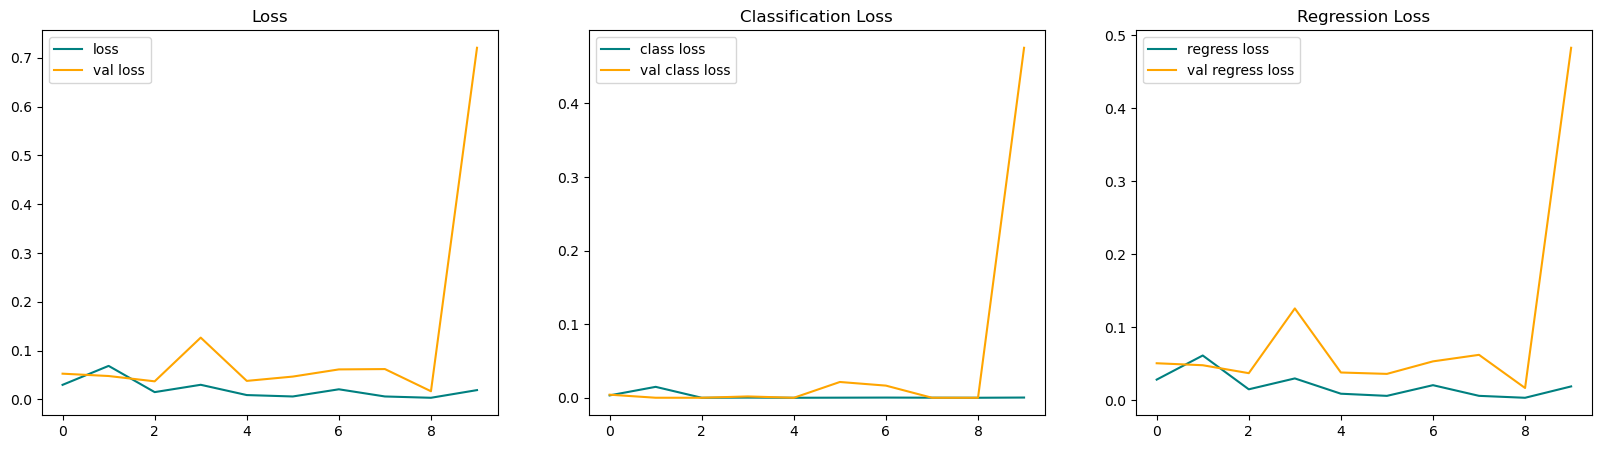

In [131]:
fig, ax = plt.subplots(ncols=3, figsize=(20,5))

ax[0].plot(history.history['total_loss'], color='teal', label='loss')
ax[0].plot(history.history['val_total_loss'], color='orange', label='val loss')
ax[0].title.set_text('Loss')
ax[0].legend()

ax[1].plot(history.history['class_loss'], color='teal', label='class loss')
ax[1].plot(history.history['val_class_loss'], color='orange', label='val class loss')
ax[1].title.set_text('Classification Loss')
ax[1].legend()

ax[2].plot(history.history['regress_loss'], color='teal', label='regress loss')
ax[2].plot(history.history['val_regress_loss'], color='orange', label='val regress loss')
ax[2].title.set_text('Regression Loss')
ax[2].legend()

plt.show()

# *Part 11: Predictions*

# *11.1 Make Predictions on Test Set*

*This iterator is useful for accessing and evaluating the test data in batches, typically when assessing the model's performance on unseen data*

In [132]:
test_data = test.as_numpy_iterator()

*This batch typically contains a set of test images and their corresponding labels*

In [133]:
test_sample = test_data.next()

*This code uses the `facetracker` model to make predictions (`yhat`) on the test data provided in `test_sample[0]`. The predictions could include both face classification results and bounding box coordinates*

In [134]:
yhat = facetracker.predict(test_sample[0])

1/1 [==============================] - 1s 661ms/step


*This visualization helps assess how well the model is performing on the test dataset by highlighting detected faces with high confidence*

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


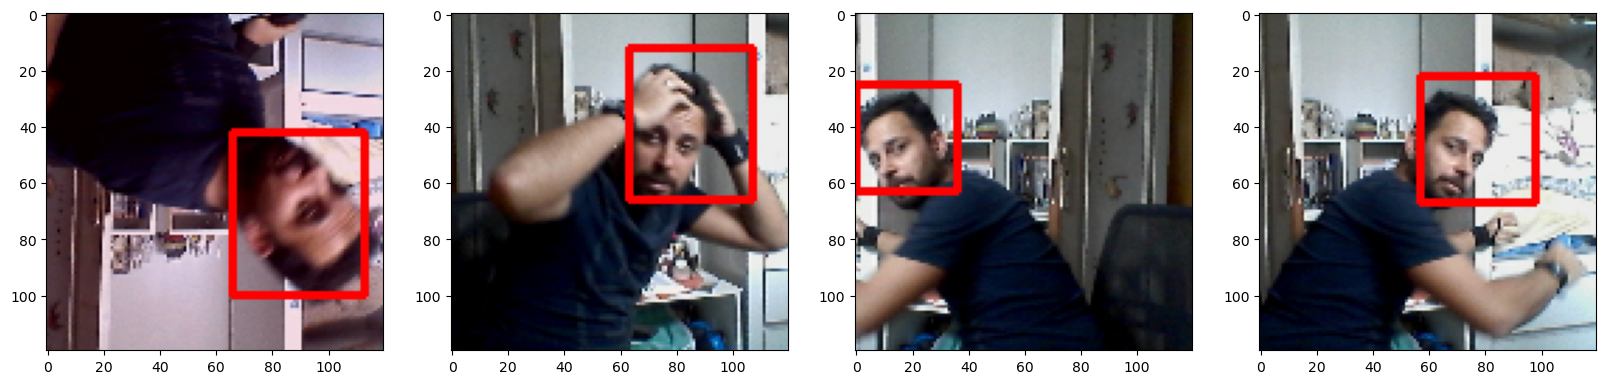

In [135]:
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx in range(4): 
    sample_image = test_sample[0][idx]
    sample_coords = yhat[1][idx]
    
    if yhat[0][idx] > 0.9:
        cv2.rectangle(sample_image, 
                      tuple(np.multiply(sample_coords[:2], [120,120]).astype(int)),
                      tuple(np.multiply(sample_coords[2:], [120,120]).astype(int)), 
                            (255,0,0), 2)
    
    ax[idx].imshow(sample_image)

# *11.2 Saving the Model*

In [136]:
from tensorflow.keras.models import load_model

*Saving the model in this way allows you to store its architecture and trained weights, making it easy to reload and reuse the model for inference or further training in the future*

In [137]:
facetracker.save('facetracker.h5')

C:\ProgramData\anaconda3\Lib\site-packages\keras\src\engine\training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


*Loading a model from a saved file is useful when you want to reuse a pre-trained model for inference, fine-tuning, or evaluation without the need to retrain it from scratch*

In [138]:
facetracker = load_model('facetracker.h5')

# *Part 12: Real-time Face Detection with Webcam Feed*

In [ ]:
#!pip install opencv-python

In [ ]:
#import cv2
#import os
#import time
#import uuid
#import tensorflow as tf
#from IPython.display import Image, display

- *It reads a frame from the camera using `cap.read()`.*

- *It crops the frame to a region of interest (ROI) specified by the dimensions `[50:500, 50:500, :]`.*

- *It converts the frame from BGR color space to RGB.*

- *It resizes the frame to a size of `(120, 120)` using TensorFlow's `tf.image.resize`.*

- *It passes the resized frame through the `facetracker` model for inference to detect faces.*

- *If the predicted face classification score (`yhat[0]`) is greater than 0.5 (indicating face detection confidence), it does the following:*



    - *Draws a red bounding box around the detected face on the frame.*
    - *Draws a label rectangle with "face" text above the face bounding box.*
    - *Renders the "face" label text on the frame.*

- *It displays the processed frame in a window named "EyeTrack".*

- *The loop continues until the user presses the 'q' key, at which point the program releases the camera and closes the OpenCV windows.*

*This code essentially implements real-time face detection from a webcam feed using the facetracker model*

*Press "q" to close the Real Time Face Detection Window Camera*

In [140]:
cap = cv2.VideoCapture(0)
while cap.isOpened():
    ret, frame = cap.read()
    
    if not ret:
        # Se não houver quadro válido, saia do loop
        break
    
    frame = frame[50:500, 50:500, :]
    
    rgb = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
    resized = tf.image.resize(rgb, (120,120))
    
    yhat = facetracker.predict(np.expand_dims(resized/255,0))
    sample_coords = yhat[1][0]
    
    if yhat[0] > 0.5: 
        # Controls the main rectangle
        cv2.rectangle(frame, 
                      tuple(np.multiply(sample_coords[:2], [450,450]).astype(int)),
                      tuple(np.multiply(sample_coords[2:], [450,450]).astype(int)), 
                            (255,0,0), 2)
        # Controls the label rectangle
        cv2.rectangle(frame, 
                      tuple(np.add(np.multiply(sample_coords[:2], [450,450]).astype(int), 
                                    [0,-30])),
                      tuple(np.add(np.multiply(sample_coords[:2], [450,450]).astype(int),
                                    [80,0])), 
                            (255,0,0), -1)
        
        # Controls the text rendered
        cv2.putText(frame, 'face', tuple(np.add(np.multiply(sample_coords[:2], [450,450]).astype(int),
                                               [0,-5])),
                    cv2.FONT_HERSHEY_SIMPLEX, 1, (255,255,255), 2, cv2.LINE_AA)
    
    cv2.imshow('EyeTrack', frame)
    
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break
cap.release()
cv2.destroyAllWindows()

1/1 [==============================] - 0s 79ms/step
